# Classify elderly activities using k-nearest neighbours in Python
_________

This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify activities of elderly patients.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [1]:
# Set-up libraries
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
# Read-in data
df = pd.read_csv('../00-Datasets/fall.csv')

In [4]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [5]:
# Look at some records
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [6]:
# Check for missing values
df.isna().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64

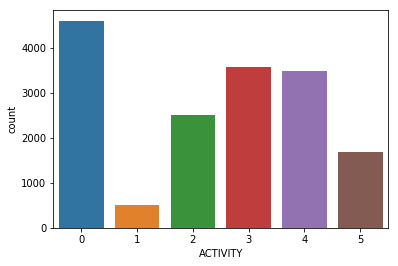

In [7]:
# Look at breakdown of label
sns.countplot(df['ACTIVITY'])
df['ACTIVITY'].value_counts()

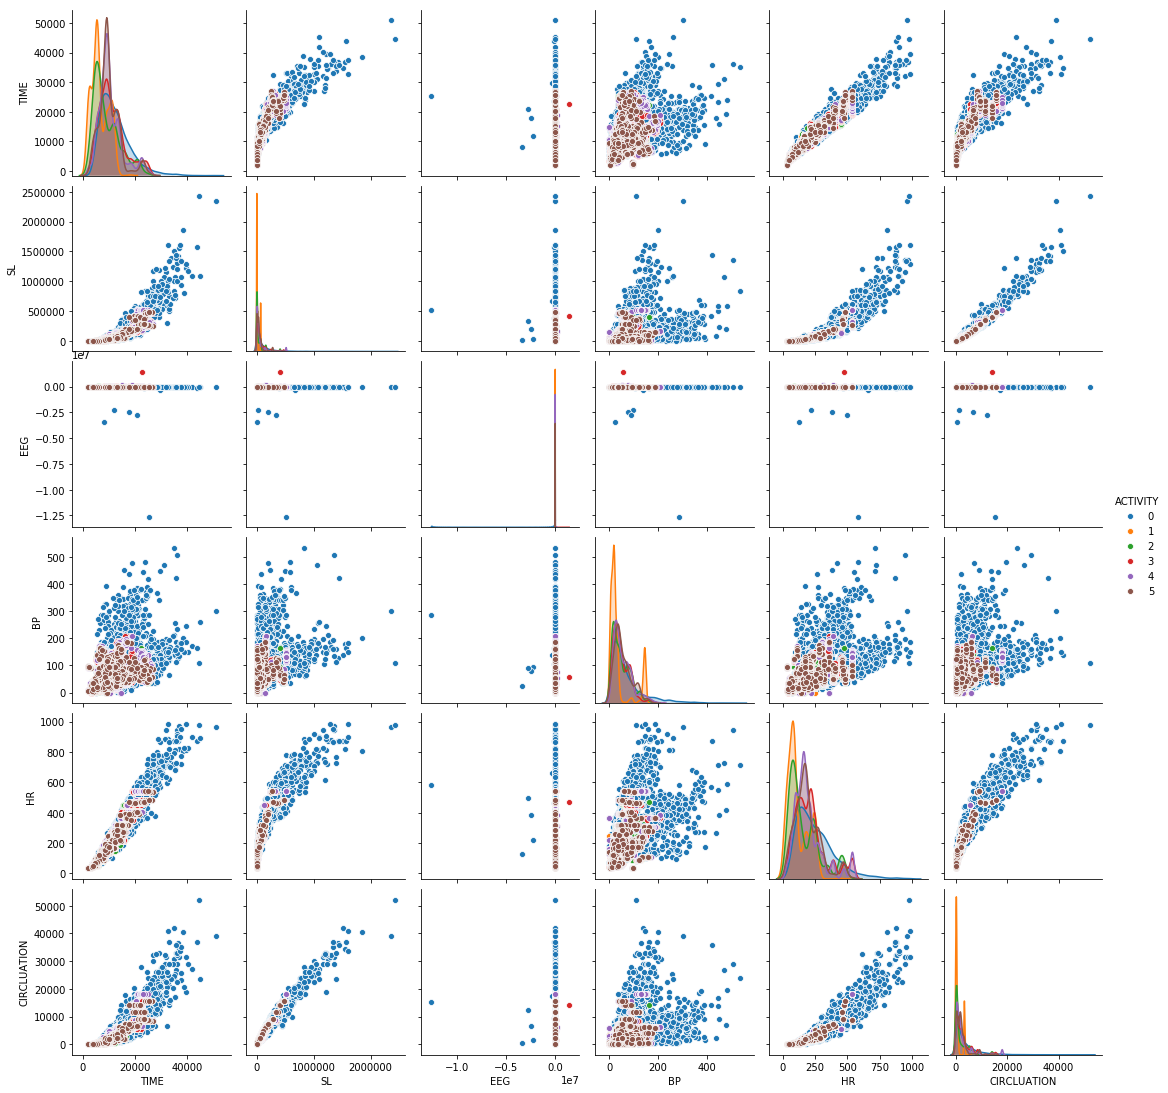

In [8]:
# Explore data visually with multiple scatter plots
sns.pairplot(df, hue='ACTIVITY')

In [9]:
# Summarise
df.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


## Step 2: Preprocess data
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean. 
	
Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [10]:
# Split dataset into 80% train and 20% validation
X = df.drop('ACTIVITY', axis=1)
y = df['ACTIVITY']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.

We create the model and fit the model to the data we prepared for training.
	
We then proceed to classifying with the data we prepared for validation.
	
Lastly, we evaluate the model's performance with mainstream classification metrics. 

In [11]:
# Build and train model
classifier = KNeighborsClassifier(n_neighbors=5)
knn = classifier.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# Apply model to validation data
y_predict = classifier.predict(X_val)

In [13]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual ': y_val,
                                 'Prediction ': y_predict}
                                )
actual_vs_predict.head(10)

,Actual,Prediction
3180,3,4
12289,0,0
7535,0,0
598,4,4
5136,4,5
10760,5,5
3909,3,4
5619,3,3
13297,4,4
3266,4,5


In [14]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       914
           1       0.73      0.73      0.73       105
           2       0.60      0.72      0.65       483
           3       0.58      0.64      0.61       735
           4       0.61      0.61      0.61       711
           5       0.60      0.50      0.55       329

    accuracy                           0.66      3277
   macro avg       0.66      0.66      0.66      3277
weighted avg       0.67      0.66      0.66      3277



## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/